<a href="https://colab.research.google.com/github/Thammawit/Dataset1/blob/master/LPG_out.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Load Data**

In [1]:
%tensorflow_version 1.x
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
np.random.seed(7)

TensorFlow 1.x selected.


Using TensorFlow backend.


In [2]:
url ='https://raw.githubusercontent.com/Thammawit/Dataset1/master/LPG_out.csv'
df = pd.read_csv(url, index_col=[0], parse_dates=[0])
df.head(5)

,Out
Time,
?.?.-19,17394640
?.?.-19,16866790
??.?.-19,17911200
??.?.-19,16052470
?.?.-19,16669100


In [3]:
df['Out-1'] = df['Out'].shift(1)
df.head()

,Out,Out-1
Time,,
?.?.-19,17394640,NaN
?.?.-19,16866790,17394640.0
??.?.-19,17911200,16866790.0
??.?.-19,16052470,17911200.0
?.?.-19,16669100,16052470.0


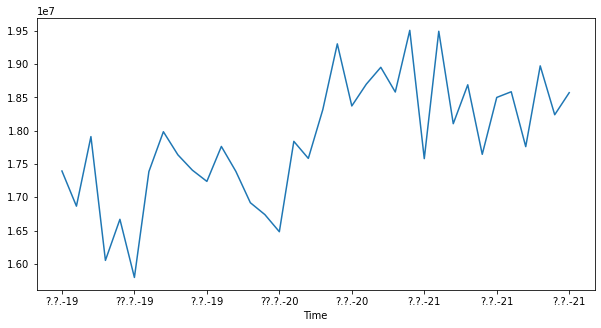

In [4]:
plt.figure(figsize=(10,5))

df['Out'].plot()

# **Step 2: Prepare Data**

## **a) Normalize the dataset**

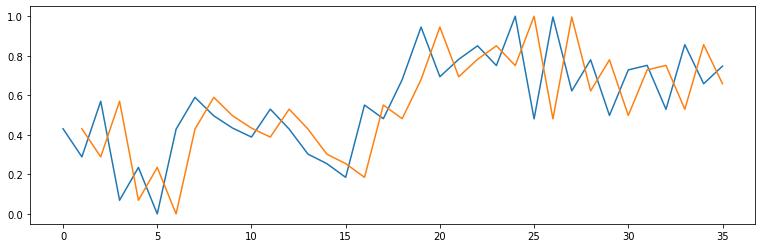

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(df)

plt.figure(figsize=(13,4))
plt.plot(data[:,0])
plt.plot(data[:,1])

## **b) Split into train vs test datasets**

In [6]:
# split into train and test sets
n = int(len(data)*0.8)
trainY = data[1:n,0]  #(starting from row1 to remove nan value) 
trainX = data[1:n,1:] 
testY = data[n:len(data),0]
testX = data[n:len(data),1:]

print(trainY.shape)
print(trainX.shape)
print('=====Out-1=======')
for i in range(2):
  print(trainX[i], trainY[i])

print(testY.shape)
print(testX.shape)
print('=====Out-1=======')
for i in range(2):
  print(testX[i,:], testY[i])

(27,)
(27, 1)
=====Out-1=======
[0.43079071] 0.28852611890015467
[0.28852612] 0.5700124516890641
(8,)
(8, 1)
=====Out-1=======
[0.62223408] 0.7796751780160314
[0.77967518] 0.498291261717255


# **Step 3: Formulate ANN model**

In [22]:
from keras.optimizers import Adam
opt = Adam(lr=0.05)

model = Sequential()
model.add(Dense(6, activation='sigmoid', input_dim=1))#
model.add(Dense(6, activation='sigmoid'))#
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer=opt)
history = model.fit(trainX, trainY, validation_split=0.1, epochs=100, batch_size=24, verbose=1)

Train on 24 samples, validate on 3 samples
Epoch 1/100
24/24 [==============================] - 0s 10ms/step - loss: 0.0682 - val_loss: 0.1003
Epoch 2/100
24/24 [==============================] - 0s 242us/step - loss: 0.0666 - val_loss: 0.1072
Epoch 3/100
24/24 [==============================] - 0s 143us/step - loss: 0.0674 - val_loss: 0.0986
Epoch 4/100
24/24 [==============================] - 0s 160us/step - loss: 0.0660 - val_loss: 0.0870
Epoch 5/100
24/24 [==============================] - 0s 251us/step - loss: 0.0653 - val_loss: 0.0791
Epoch 6/100
24/24 [==============================] - 0s 152us/step - loss: 0.0657 - val_loss: 0.0772
Epoch 7/100
24/24 [==============================] - 0s 280us/step - loss: 0.0658 - val_loss: 0.0800
Epoch 8/100
24/24 [==============================] - 0s 244us/step - loss: 0.0652 - val_loss: 0.0856
Epoch 9/100
24/24 [==============================] - 0s 127us/step - loss: 0.0646 - val_loss: 0.0917
Epoch 10/100
24/24 [=============================

In [9]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None


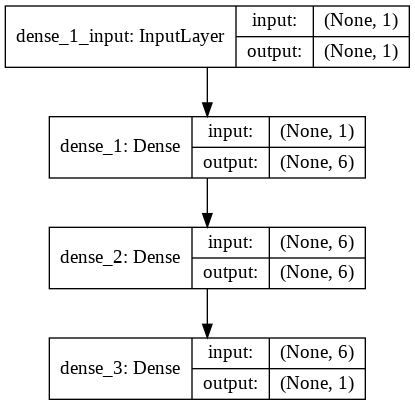

In [8]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

# **Step 4: Predict and calculate RMSE**

In [23]:
#predict the load
testPredict = model.predict(testX)

#denormalize the test set
testY_dn = testY*(df['Out'].max()-df['Out'].min())+df['Out'].min()  

#denormalize the prediction
testPredict_dn = testPredict*(df['Out'].max()-df['Out'].min())+df['Out'].min() 

In [12]:
testY_dn.shape

(8,)

In [13]:
testPredict_dn.shape

(8, 1)

In [14]:
testPredict_dn.ravel().shape

(8,)

RMSE= 898744.9871247384
MAPE= 4.335608102598635


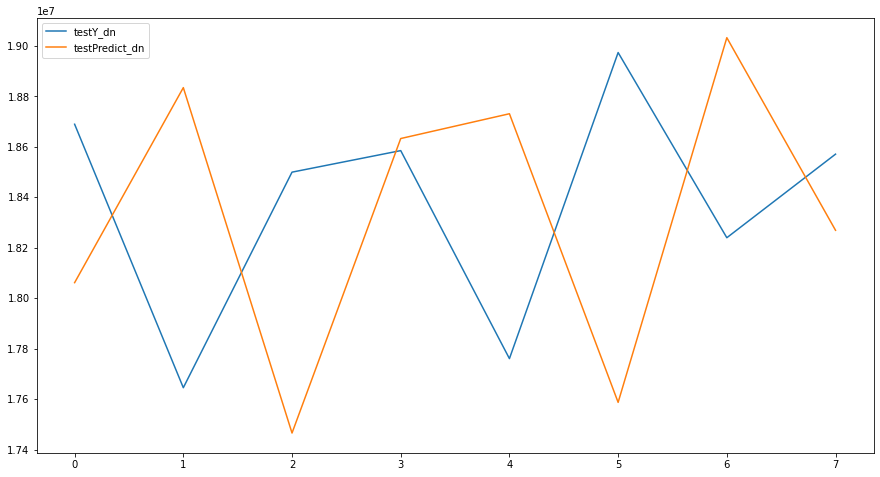

In [24]:
#plot testY vs testPredict
plt.figure(figsize=(15,8))
plt.plot(testY_dn, label='testY_dn')
plt.plot(testPredict_dn, label='testPredict_dn')
plt.legend(loc='upper left')

#calculate RMSE and MAPE
RMSE = np.sqrt(np.mean(np.square(testY_dn-testPredict_dn.ravel())))
MAPE = np.mean(np.abs((testY_dn-testPredict_dn.ravel())/testY_dn))*100

print('RMSE=',RMSE)
print('MAPE=',MAPE)

# Step 5: Check model loss and validation loss

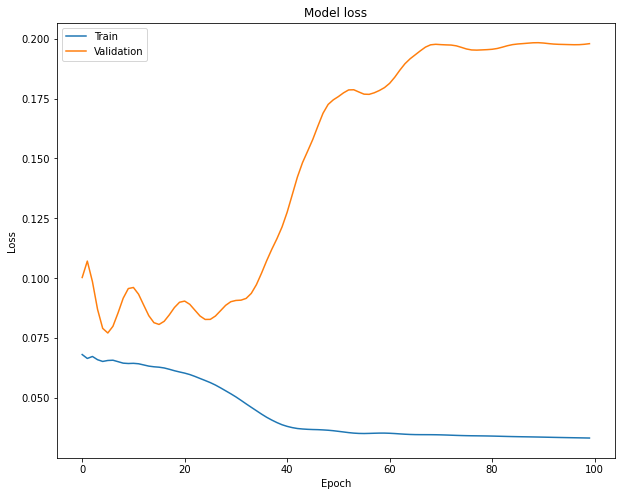

In [25]:
#Check model loss and validation loss
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()